# Projeto de Disciplina - Clusterização

## Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn import preprocessing as preproc
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.decomposition import PCA

# Macros
RIGHT_dec_format = lambda x: x.__str__().replace('.',',')

## Importação e Normalização dos Dados

In [2]:
csv = pd.read_csv("datasets/Country-data.csv")
labels = pd.read_csv("datasets/data-dictionary.csv")
dataset_raw = pd.DataFrame(csv)
labels = pd.DataFrame(labels)

In [3]:
dataset_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Define como variável global a quantidade de países para usá-la como entrada na quantidade de amostras (_n_samples_):

In [5]:
N_COUNTRIES=dataset_raw['country'].count()

In [6]:
dataset = preproc.StandardScaler().fit_transform(dataset_raw.iloc[:,1:])
dataset

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

In [7]:
dataset = pd.DataFrame(dataset, columns=labels.iloc[1:, 0].apply(lambda column : column.lower()))
dataset

Column Name,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [8]:
dataset_scaled = preproc.StandardScaler().fit_transform(dataset.iloc[:,1:])
dataset_scaled

array([[-1.13827979,  0.27908825, -0.08245496, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.47965843, -0.09701618,  0.07083669, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.09912164, -0.96607302, -0.64176233, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [ 1.13030491,  0.0088773 ,  1.38003025, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [-0.40647827, -0.59727159, -0.5174718 , ..., -0.34463279,
         1.14094382, -0.63775406],
       [-0.15034774, -0.33801514, -0.66247742, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 8))

In [9]:
pca_2 = PCA(n_components=2)
dataset_pca = pca_2.fit_transform(dataset_scaled)

## Dendrogramas

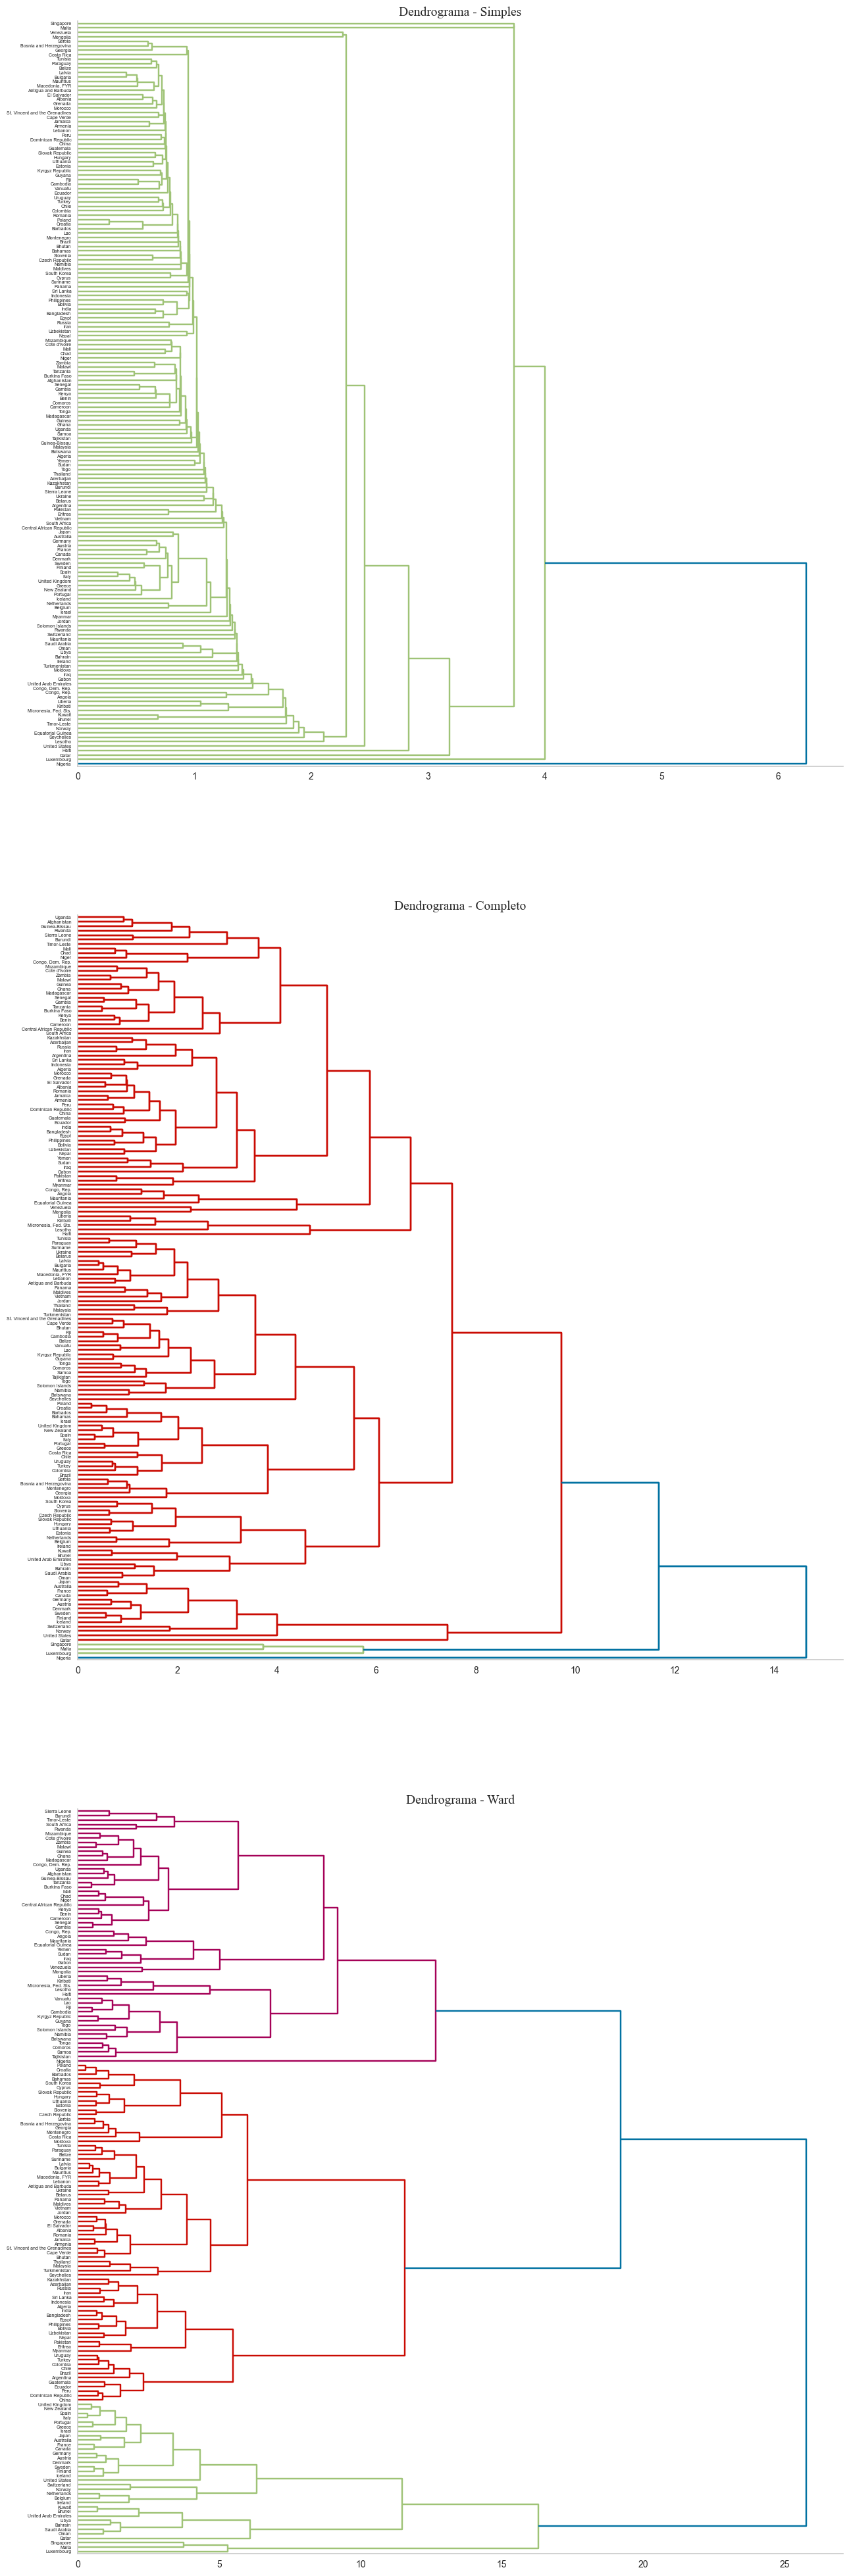

In [10]:
f, ax = plt.subplots(3, 1)
f.set_figheight(50)
f.set_figwidth(15)

single_link = hierarchy.linkage(
    dataset_scaled,
    metric='euclidean',
    method='single'
)

complete_link = hierarchy.linkage(
    dataset_scaled,
    metric='euclidean',
    method='complete'
)

ward_link = hierarchy.linkage(
    dataset_scaled,
    metric='euclidean',
    method='ward'
)

hierarchy.dendrogram(
    single_link,
    labels=dataset_raw['country'].values,
    ax=ax[0],
    orientation='right'
)

hierarchy.dendrogram(
    complete_link,
    labels=dataset_raw['country'].values,
    ax=ax[1],
    orientation='right'
)

hierarchy.dendrogram(
    complete_link,
    labels=dataset_raw['country'].values,
    ax=ax[1],
    orientation='right'
)

hierarchy.dendrogram(
    ward_link,
    labels=dataset_raw['country'].values,
    ax=ax[2],
    orientation='right'
)

ax[0].set_title('Dendrograma - Simples', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title('Dendrograma - Completo', fontfamily='Times New Roman', fontsize=14)
ax[2].set_title('Dendrograma - Ward', fontfamily='Times New Roman', fontsize=14)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
sb.despine()

## Índice de Silhueta

In [11]:
X, labels = make_blobs(n_samples=N_COUNTRIES, n_features=2, random_state=42)

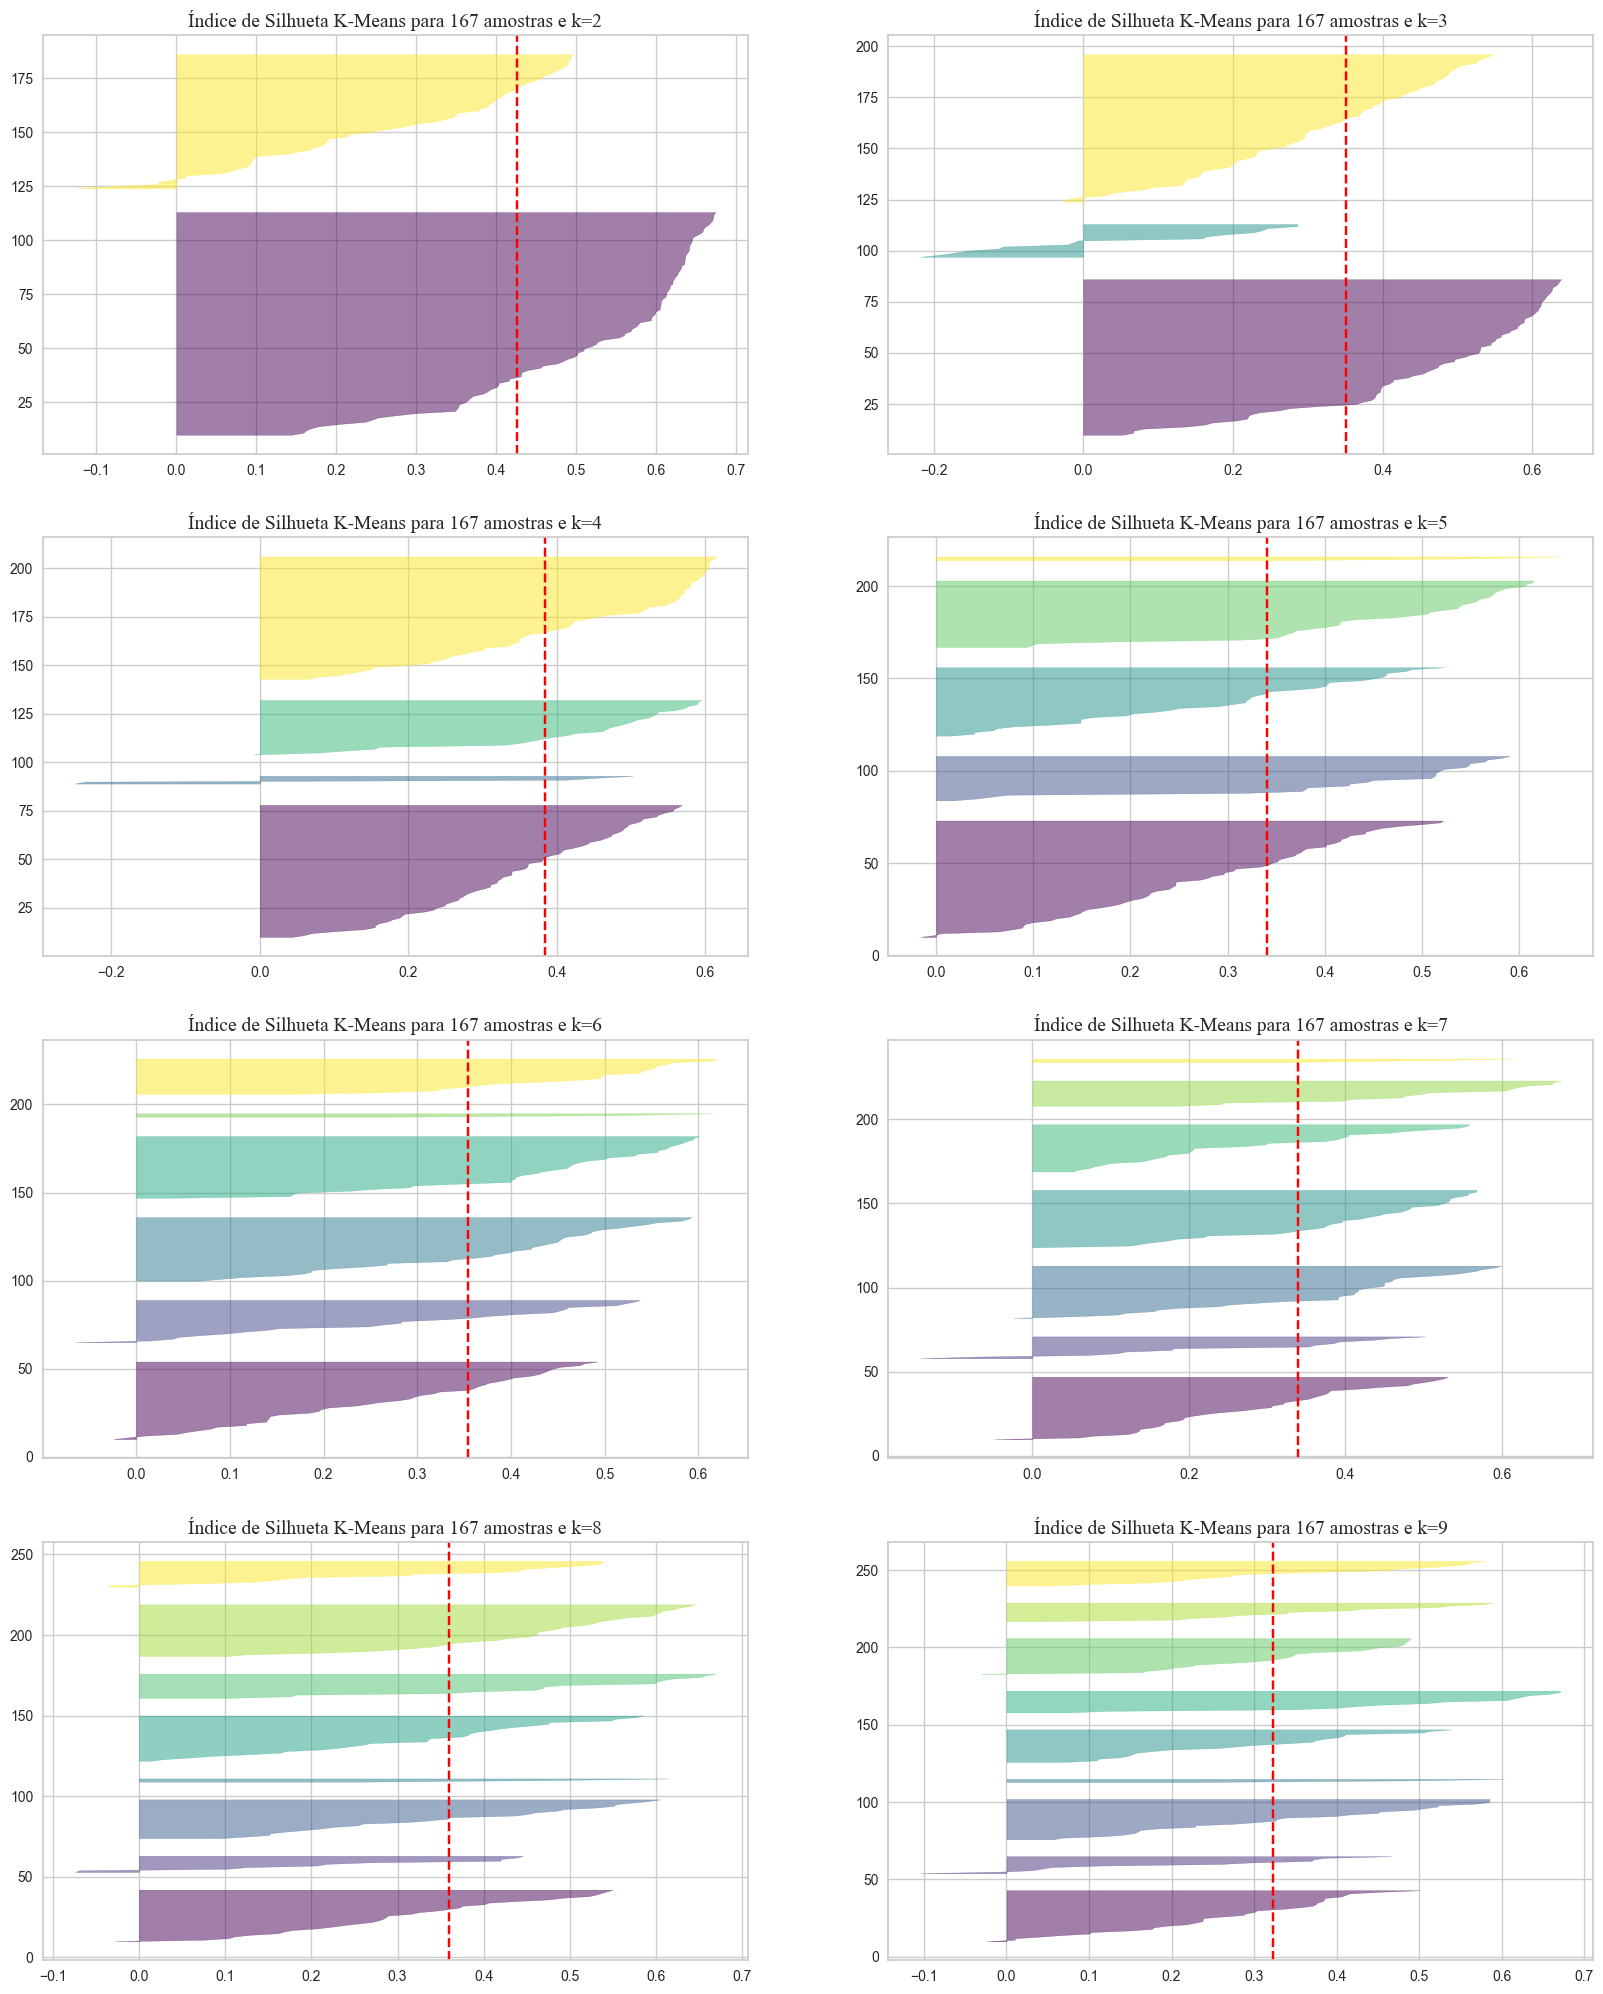

In [12]:
f, ax = plt.subplots(4, 2)
f.set_figheight(25)
f.set_figwidth(20)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    sv = SilhouetteVisualizer(
        kmeans,
        colors='viridis',
        is_fitted='auto',
        ax=ax[q-1][mod-2]
    )
    ax[q-1][mod-2].set_title(f'Índice de Silhueta K-Means para {len(X)} amostras e k={i}', fontfamily='Times New Roman', fontsize=14)
    sv.fit(dataset_pca)

<div align="center">

|  Clusters   | Comparações                                                                                                                                                                                                                  |
|:-----------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  k=2 e k=3  | Ambos os casos os clusters possuem as silhuetas muito grandes, indicando a necessidade de mais clusters.                                                                                                                     |
|  k=4 e k=5  | Apesar de k=4 possuir um cluster a menos que k=5, sua média é maior e suas sulhuetas não são tão maiores em comparação a mesma.<br/>A silhueta mais fina indica os dados discrepantes que não fora removidos no preprocessamento. |
| k=6 até k=9 | Tamanho não igualitário entre os clusters. Visivelmente há clusters menores e outros maiores, o que indica excesso de clusters.                                                                                              |

</div>

## k=4

## k=5

## Método Cotovelo

Também foi utilizado o Método do Cotovelo para descobrir a quantidade ótima de clusters, o que confirmou que o resultado do método anterior.

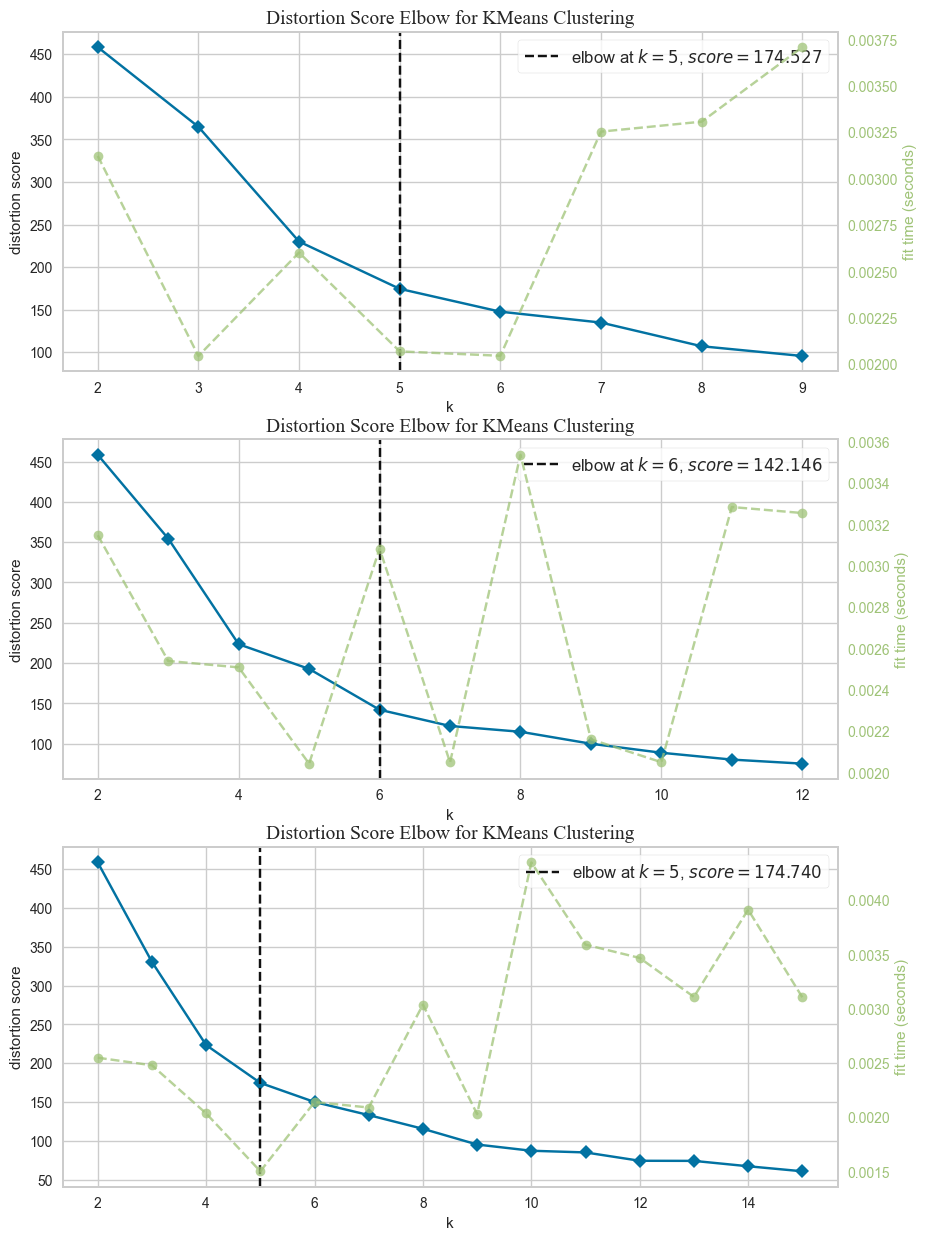

In [13]:
f, ax = plt.subplots(3)
f.set_figheight(15)
f.set_figwidth(10)

v1 = KElbowVisualizer(KMeans(), k=9, ax=ax[0])
v1.fit(dataset_pca)
v1.finalize()

v2 = KElbowVisualizer(KMeans(), k=12, ax=ax[1])
v2.fit(dataset_pca)
v2.finalize()

v3 = KElbowVisualizer(KMeans(), k=15, ax=ax[2])
v3.fit(dataset_pca)
v3.finalize()

for x in range(len(ax)):
    ax[x].set_title(label="Distortion Score Elbow for KMeans Clustering", fontfamily='Times New Roman', fontsize=14)

plt.show()

Define como variável global a quantidade ótima de clusters encontrada para utiliza-la como entrada para

In [14]:
OPTIMAL_NCLUSTERS=4

## Parametriza o número ótimo de clusters

In [15]:
hues = pd.Series()
EPS=0.35

kmeans = KMeans(n_clusters=OPTIMAL_NCLUSTERS).fit(dataset_pca)
hues['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=OPTIMAL_NCLUSTERS, linkage='ward', metric='euclidean').fit(dataset_pca)
hues['ward'] = ward.labels_

dbscan = DBSCAN(eps=EPS, min_samples=OPTIMAL_NCLUSTERS, n_jobs=-1, metric='euclidean').fit(dataset_pca)
hues['dbscan'] = dbscan.fit_predict(dataset_pca)

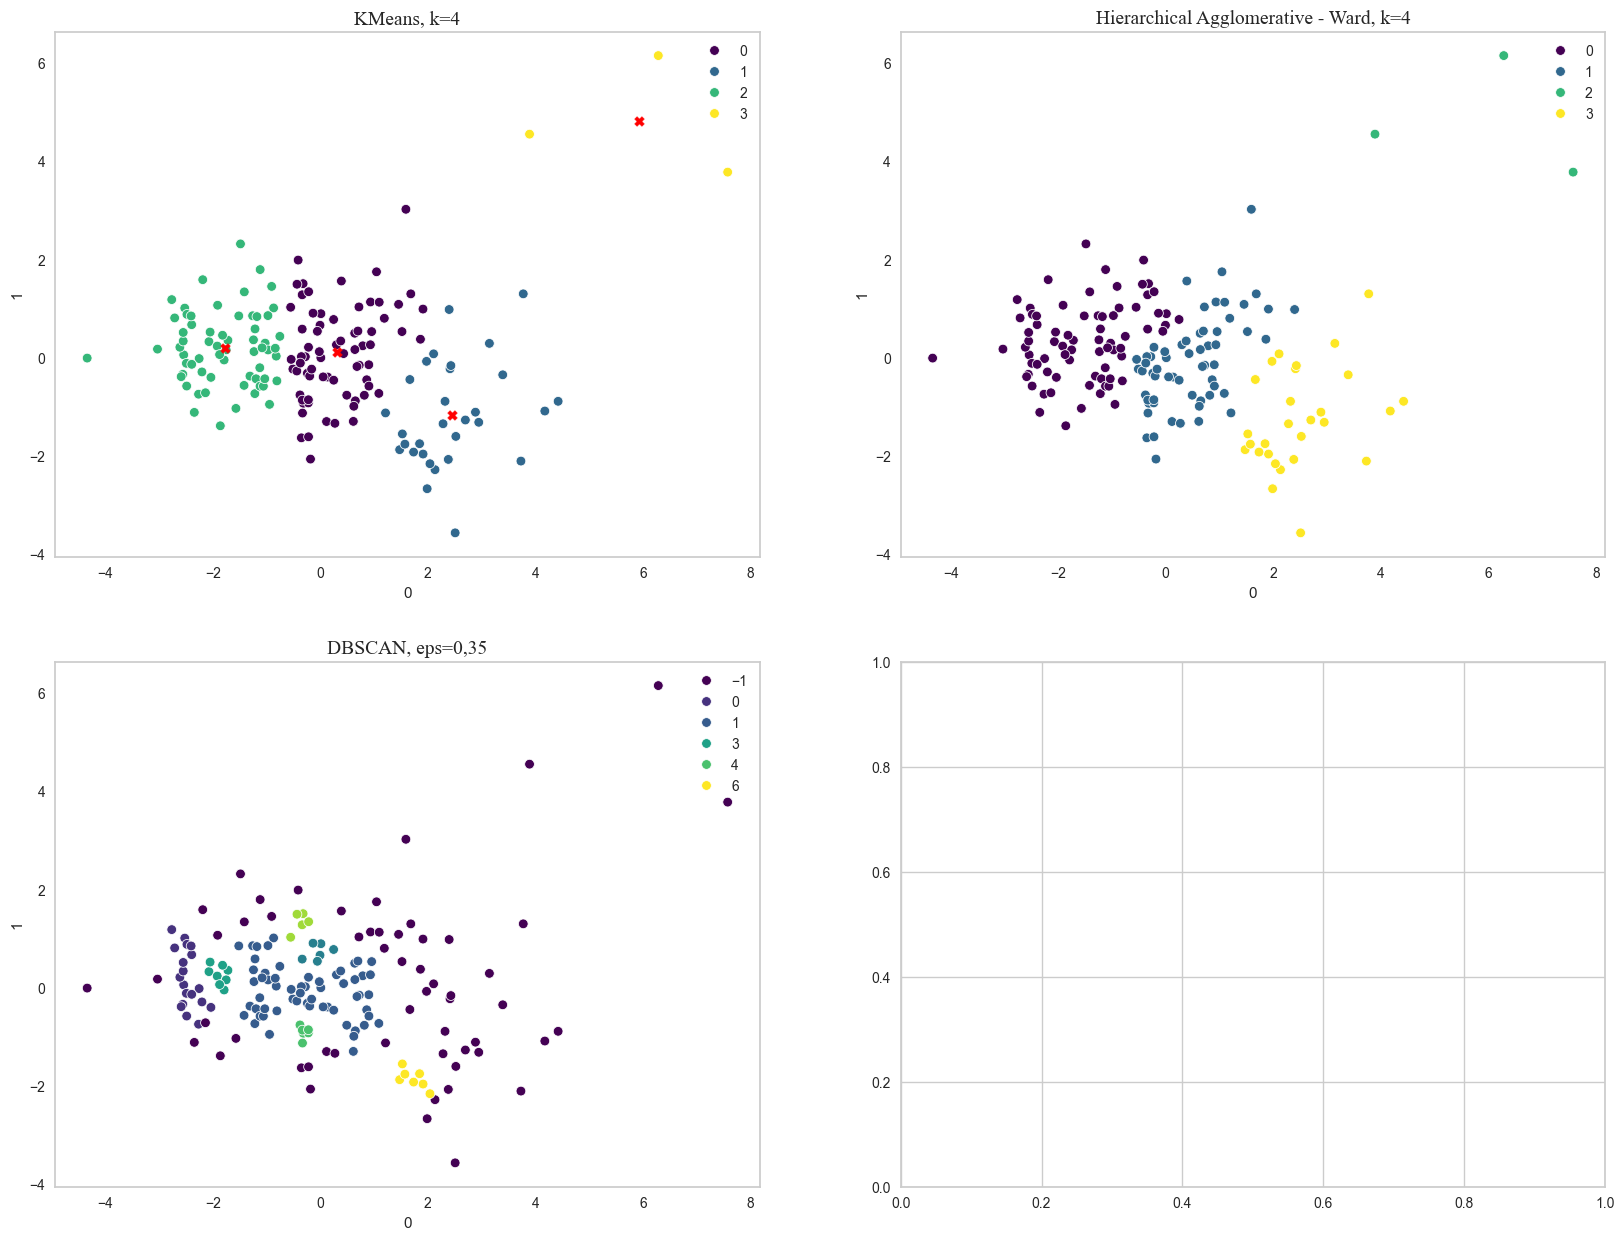

In [16]:
f, ax = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(20)

dataset_pca = pd.DataFrame(dataset_pca)

sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['kmeans'],
    palette='viridis',
    ax=ax[0][0]
)

ax[0][0].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)

kmeans_lm = sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['ward'],
    palette='viridis',
    ax=ax[0][1]
)


sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['dbscan'],
    palette='viridis',
    ax=ax[1][0]
)

ax[0][0].set_title(f'KMeans, k={OPTIMAL_NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[0][1].set_title(f'Hierarchical Agglomerative - Ward, k={OPTIMAL_NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[1][0].set_title(f'DBSCAN, eps={RIGHT_dec_format(EPS)}', fontfamily='Times New Roman', fontsize=14)

ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)

Text(0, 0.5, '')

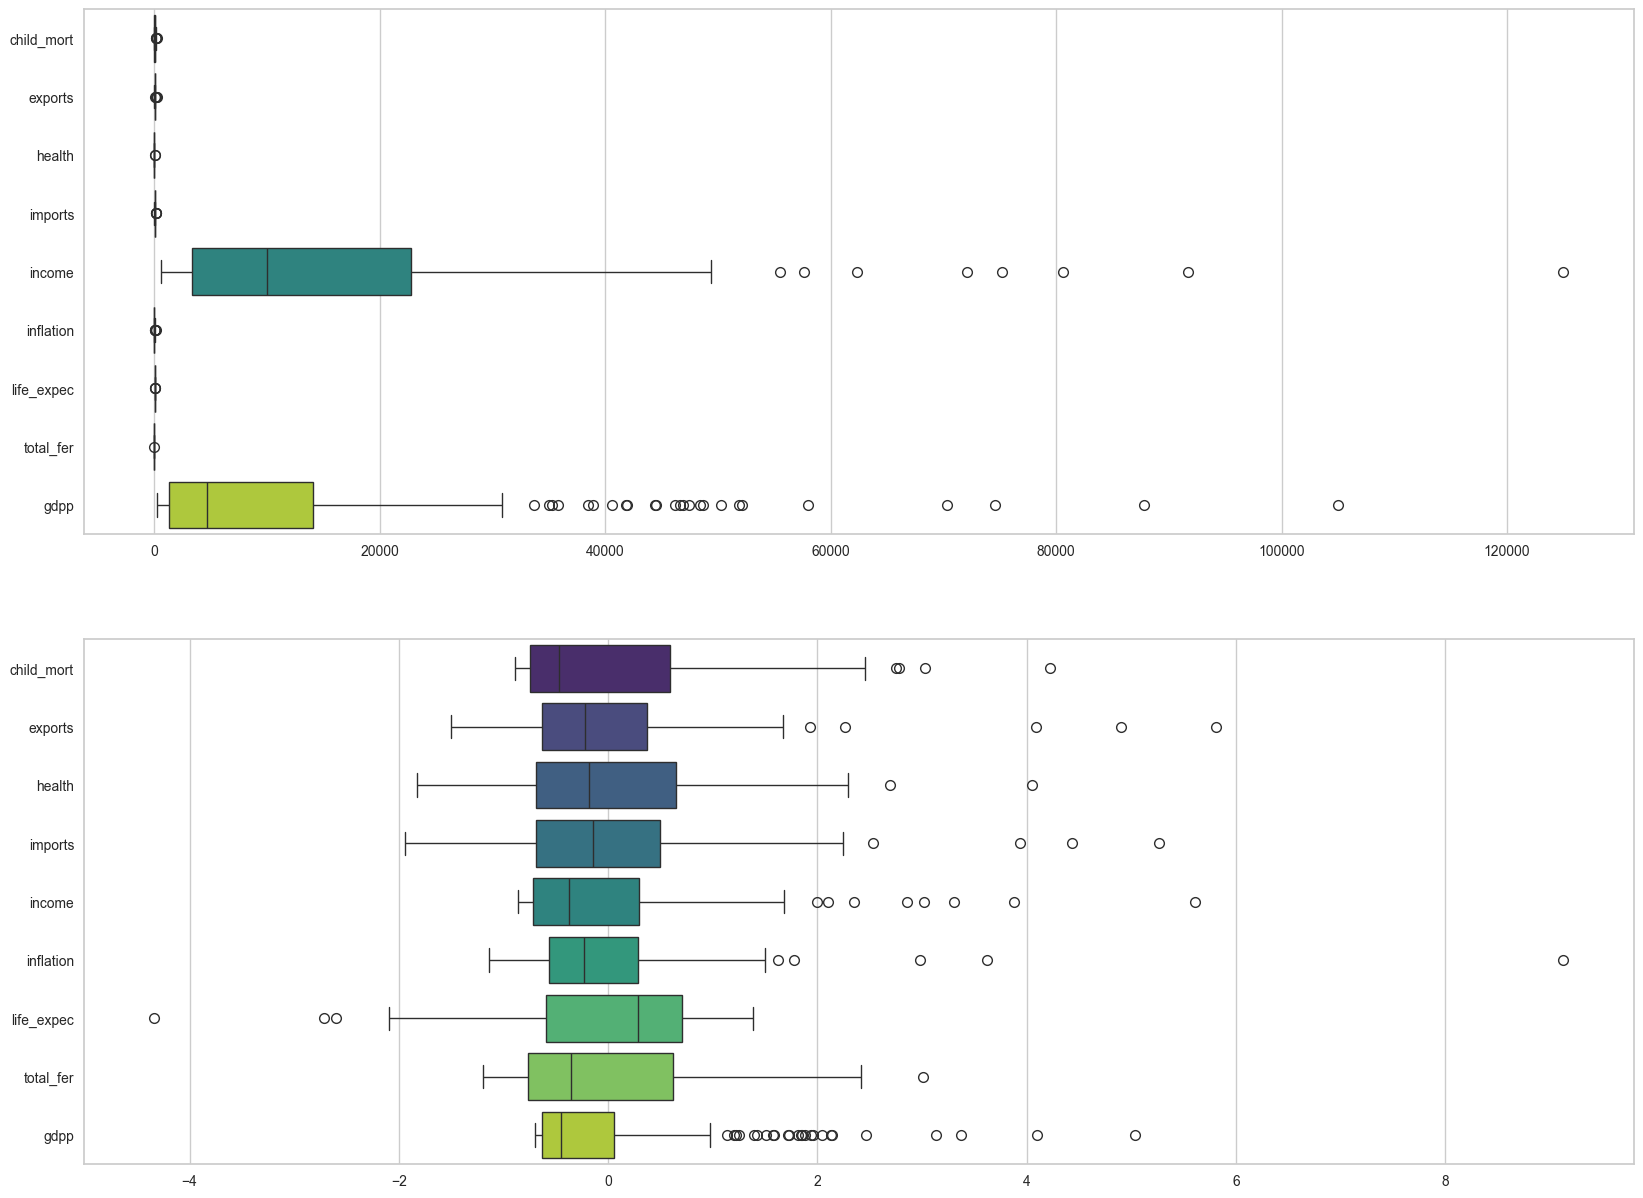

In [17]:
f, ax = plt.subplots(2, 1)
f.set_figheight(15)
f.set_figwidth(20)

sb.boxplot(dataset_raw, ax=ax[0], orient='h', palette='viridis')
sb.boxplot(
    data=dataset,
    ax=ax[1],
    orient='h',
    palette='viridis'
)

ax[1].set_ylabel("")